# LeNet:
Goal : To recognize the handwritten digits on bank cheques

In [1]:
import torch
import torch.nn as nn

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=4, stride=1, padding=0)
        self.linear1 = nn.Linear(120,84)
        self.linear2 = nn.Linear(84,10)

    def forward(self,x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x
        
        

In [2]:
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

# Transform: convert to tensor and normalize (mean=0.1307, std=0.3081 are MNIST stats)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load training and test datasets
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 36.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.01MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.30MB/s]


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
EPOCHS = 10

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}", leave=False)

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    print(f"Epoch [{epoch+1}/{EPOCHS}] - Avg Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10] - Avg Loss: 0.3003


Epoch [2/10] - Avg Loss: 0.0863


Epoch [3/10] - Avg Loss: 0.0615


Epoch [4/10] - Avg Loss: 0.0501


Epoch [5/10] - Avg Loss: 0.0423


Epoch [6/10] - Avg Loss: 0.0356


Epoch [7/10] - Avg Loss: 0.0318


Epoch [8/10] - Avg Loss: 0.0267


Epoch [9/10] - Avg Loss: 0.0253


Epoch [10/10] - Avg Loss: 0.0208


Test Accuracy: 98.84%


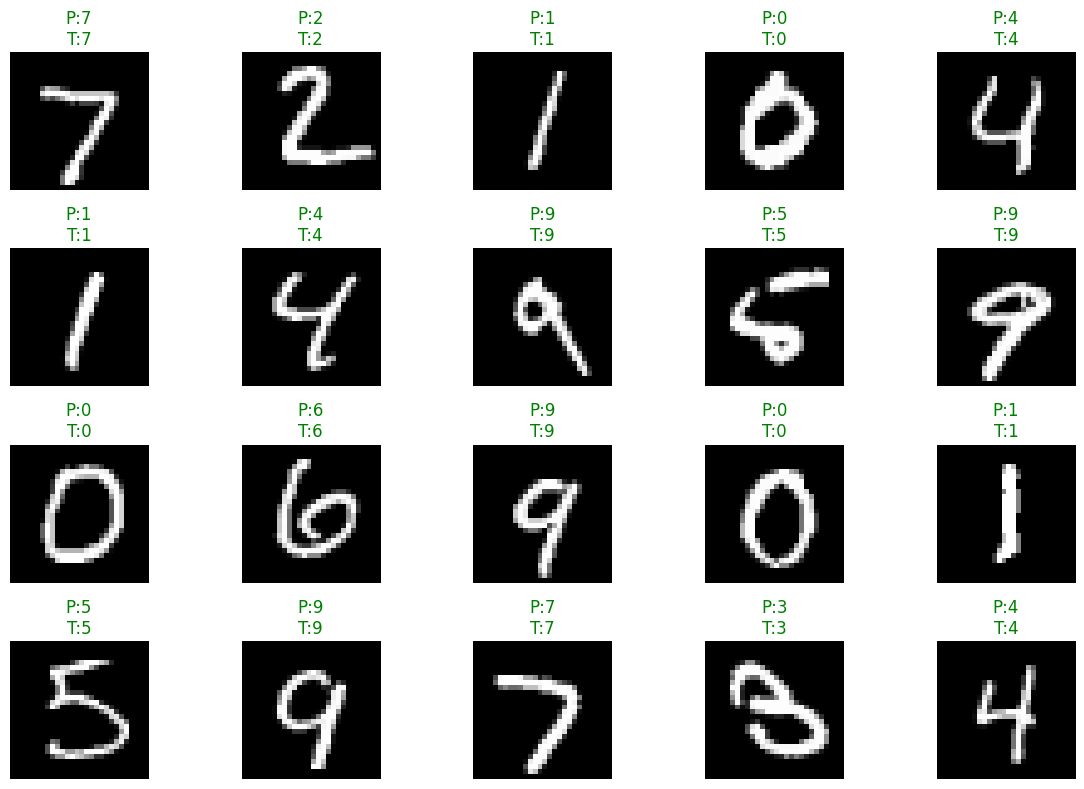

In [9]:
# Get all predictions and labels
model.eval()
all_images, all_preds, all_labels = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_images.extend(images.cpu())       
        all_preds.extend(predicted.cpu())     
        all_labels.extend(labels.cpu()) 
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Plot first 20 images with predictions
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(all_images[i].squeeze(), cmap='gray')
    color = "green" if all_preds[i] == all_labels[i] else "red"
    plt.title(f"P:{all_preds[i].item()}\nT:{all_labels[i].item()}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
